In [20]:
import tensorflow as tf
print(tf.__version__)
print("GPU", "Available" if tf.config.list_physical_devices('GPU') else "Not Found")

2.10.1
GPU Available


In [21]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load the Data

In [22]:
df = pd.read_csv("../1. Keras Basics/Data/fake_reg.csv")
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


# Visualisation

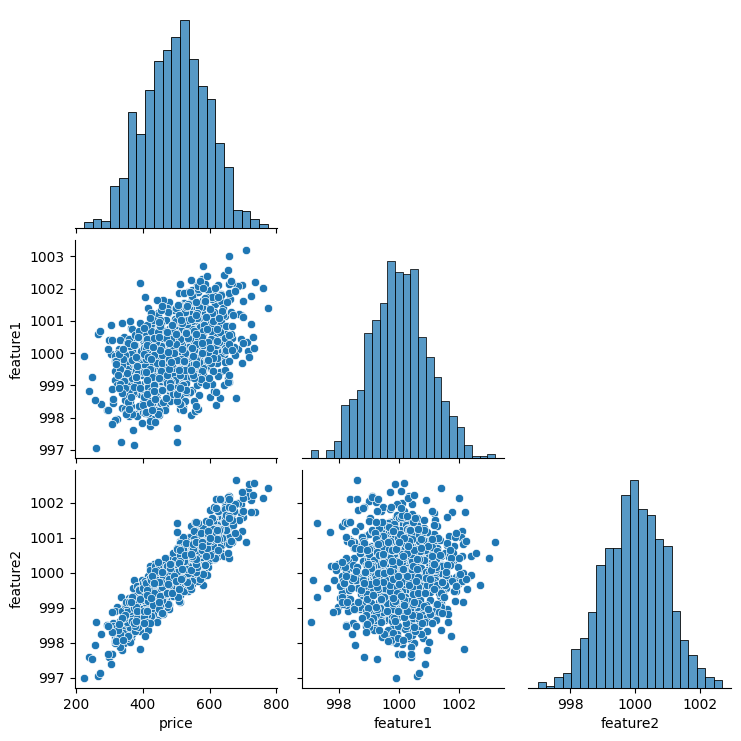

In [23]:
sns.pairplot(df, corner=True);

# Train/test Split

In [24]:
from sklearn.model_selection import train_test_split

# Features and Target
X = df.drop("price", axis=1)
y = df["price"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
print(X_test.shape,X_train.shape,y_test.shape,y_train.shape)

(200, 2) (800, 2) (200,) (800,)


# Normalizing/Scaling the Data

Make all the data come btw 0-1 by scaling it accordingly

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

Notice to prevent data leakage from the test set, we only fit our scaler to the training set

In [27]:
scaler.fit(X_train)

MinMaxScaler()

In [28]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train

array([[0.6096    , 0.67841447],
       [0.52888958, 0.20003528],
       [0.66124446, 0.48545932],
       ...,
       [0.55540613, 0.78470227],
       [0.29338885, 0.38107935],
       [0.56890903, 0.41595995]])

# Creating a Model

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

# Layers are added in sequential manner

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

**CAN CHOOSE MANY OPTIMIZERS BUT LOSS HAS TO BE THESE ONLY**

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

In [30]:
# Adding Layers one by one, one layer at a time
model = Sequential()

model.add(Dense(4,activation='relu')) # 4 Neurons in the first layer using the 
model.add(Dense(4,activation='relu')) # 2 Neurons in the second
model.add(Dense(4,activation='relu')) # activation function of  Rectified Linear Unit

model.add(Dense(1)) # Output 1 Neuron Because we are only predicting 1 thing: price

model.compile(optimizer="rmsprop", loss="mse")

# Training a Model:

We should have a large epochs value but later on we will have callbacks to stop at certain epochs, validation_data

In [31]:
model.fit(X_train,y_train,epochs=250)

Epoch 1/250


25/25 [==============================] - 1s 5ms/step - loss: 255909.9531
Epoch 2/250
25/25 [==============================] - 0s 18ms/step - loss: 255856.4531
Epoch 3/250
25/25 [==============================] - 0s 18ms/step - loss: 255796.8438
Epoch 4/250
25/25 [==============================] - 0s 13ms/step - loss: 255731.9219
Epoch 5/250
25/25 [==============================] - 0s 5ms/step - loss: 255660.5469
Epoch 6/250
25/25 [==============================] - 0s 6ms/step - loss: 255582.2188
Epoch 7/250
25/25 [==============================] - 0s 7ms/step - loss: 255496.2344
Epoch 8/250
25/25 [==============================] - 0s 8ms/step - loss: 255402.6250
Epoch 9/250
25/25 [==============================] - 0s 7ms/step - loss: 255299.9844
Epoch 10/250
25/25 [==============================] - 0s 7ms/step - loss: 255186.9375
Epoch 11/250
25/25 [==============================] - 0s 6ms/step - loss: 255061.5000
Epoch 12/250
25/25 [==============================] - 0s 6ms/step - loss

In [32]:
model.history.history

{'loss': [255909.953125,
  255856.453125,
  255796.84375,
  255731.921875,
  255660.546875,
  255582.21875,
  255496.234375,
  255402.625,
  255299.984375,
  255186.9375,
  255061.5,
  254922.921875,
  254770.578125,
  254602.578125,
  254418.421875,
  254215.375,
  253991.546875,
  253744.921875,
  253471.6875,
  253170.6875,
  252841.859375,
  252482.15625,
  252090.34375,
  251663.21875,
  251206.5,
  250708.984375,
  250172.984375,
  249594.640625,
  248969.40625,
  248304.796875,
  247590.84375,
  246826.703125,
  246006.3125,
  245135.734375,
  244205.203125,
  243219.265625,
  242169.5625,
  241058.59375,
  239885.203125,
  238637.546875,
  237327.078125,
  235933.015625,
  234467.09375,
  232928.953125,
  231309.90625,
  229606.359375,
  227822.078125,
  225957.125,
  224000.765625,
  221951.140625,
  219814.921875,
  217578.9375,
  215246.78125,
  212832.3125,
  210316.234375,
  207696.203125,
  204972.859375,
  202152.21875,
  199233.375,
  196218.28125,
  193081.84375,
  189

In [33]:
loss = model.history.history['loss']

Text(0.5, 1.0, 'Training Loss per Epoch')

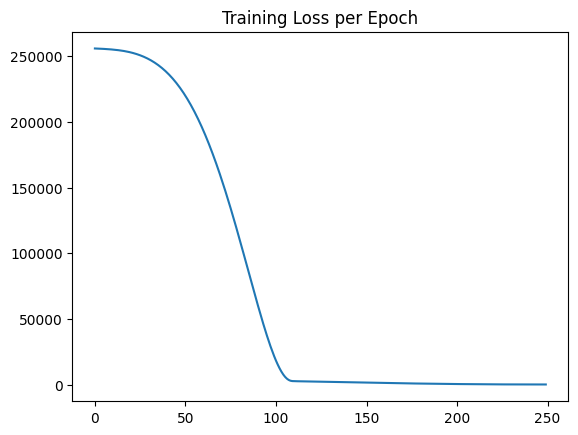

In [34]:
sns.lineplot(x=range(len(loss)), y=loss)
plt.title("Training Loss per Epoch")

# Evaluation

In [35]:
model.metrics_names

['loss']

And the loss metric is the mean squared error, which we decided to give since it is a regression problem.

In [36]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

print(f"Training Score: {training_score} \nTest Score: {test_score}")

Training Score: 27.198213577270508 
Test Score: 28.821300506591797


So the MSE for training and test set is shown above,
**NOTE** This is not Accuracy Score, this is MSE

## Further Evaluations

In [38]:
test_predictions = model.predict(X_test)
test_predictions

7/7 [==============================] - 0s 2ms/step


array([[408.01227],
       [623.25977],
       [592.1265 ],
       [573.0119 ],
       [370.559  ],
       [579.61237],
       [516.934  ],
       [460.8199 ],
       [550.3346 ],
       [449.33698],
       [611.65076],
       [549.0106 ],
       [421.6847 ],
       [411.70383],
       [649.8643 ],
       [439.388  ],
       [509.1867 ],
       [659.73926],
       [662.01904],
       [565.7819 ],
       [338.2812 ],
       [447.05508],
       [385.82278],
       [381.81198],
       [567.1473 ],
       [610.8511 ],
       [533.4672 ],
       [430.20767],
       [655.13306],
       [416.4139 ],
       [444.58032],
       [486.74985],
       [440.63007],
       [681.0789 ],
       [426.76392],
       [420.5293 ],
       [502.58603],
       [551.1445 ],
       [511.54965],
       [398.86996],
       [618.22864],
       [418.99457],
       [604.3068 ],
       [447.63638],
       [503.39468],
       [581.2635 ],
       [667.5438 ],
       [491.68707],
       [322.18268],
       [487.11343],


In [47]:
test_predictions = test_predictions.reshape(-1)  # Reshape to a 1-dimensional array

In [48]:
pred_df = pd.DataFrame({'Test Y': y_test, 'Test Predictions': test_predictions})
pred_df

,Test Y,Test Predictions
521,402.296319,408.012268
737,624.156198,623.259766
740,582.455066,592.126526
660,578.588606,573.011902
411,371.224104,370.558990
...,...,...
408,645.708440,645.077393
332,522.358884,529.362305
208,338.133842,340.873993
613,497.464727,494.272491


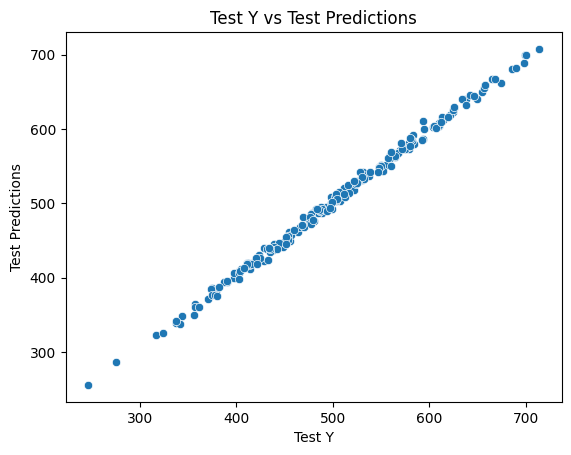

In [53]:
sns.scatterplot(x='Test Y',y='Test Predictions',data=pred_df);
plt.title("Test Y vs Test Predictions");

In [54]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_regression(y_true, y_pred):
    """
    Function to evaluate regression model performance.
    
    Arguments:
    y_true -- numpy array or list, true target values.
    y_pred -- numpy array or list, predicted target values.
    
    Returns:
    A dictionary containing the following metrics:
    - Mean Absolute Error (MAE)
    - Mean Squared Error (MSE)
    - Root Mean Squared Error (RMSE)
    - Coefficient of Determination (R^2)
    """
    
    metrics = {}
    
    # Calculate evaluation metrics
    metrics['MAE'] = mean_absolute_error(y_true, y_pred)
    metrics['MSE'] = mean_squared_error(y_true, y_pred)
    metrics['RMSE'] = np.sqrt(metrics['MSE'])
    metrics['R^2'] = r2_score(y_true, y_pred)
    
    return metrics


In [55]:
evaluate_regression(y_test, test_predictions)

{'MAE': 4.364794327587066,
 'MSE': 28.82129979923197,
 'RMSE': 5.368547270838915,
 'R^2': 0.9965819468226288}

In [56]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


So the mean price is 498.67 and our MAE is 4.36 which is pretty good.

# Predicting on brand new data

In [59]:
new_gem = [[998,1000]]
new_gem = scaler.transform(new_gem)
model.predict(new_gem)

C:\Users\prath\miniconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 97ms/step


array([[422.85046]], dtype=float32)

# Loading and Saving Models

In [60]:
from tensorflow.keras.models import load_model
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

In [61]:
later_model = load_model('my_model.h5')

In [62]:
later_model.predict(new_gem)

1/1 [==============================] - 0s 177ms/step


array([[422.85046]], dtype=float32)